In [1]:
def get_task(roll_number):
    task_mapping = {
        (0, 5): "Text Summarization",
        (1, 6): "Text Generation",
        (2, 7): "Text Classification",
        (3, 8): "Text Sentence Similarity",
        (4, 9): "Text Conversational",
    }
    
    last_digit = int(str(roll_number)[-1])
    
    for key, task in task_mapping.items():
        if last_digit in key:
            return task
    
    return "Invalid Roll Number"

# Example: Replace with your roll number
roll_number = 102203008
assigned_task = get_task(roll_number)

print(f"Roll Number: {roll_number}")
print(f"Assigned NLP Task: {assigned_task}")


Roll Number: 102203008
Assigned NLP Task: Text Sentence Similarity


In [25]:
import numpy as np
import pandas as pd

# Define the NLP task (Update based on your roll number)
assigned_task = assigned_task  # Replace with your task

# Define performance metrics for selected models (Modify based on the task)
models_data = {
    "Model": ["GPT-2", "GPT-3", "T5", "LLaMA", "Falcon"],
    "Accuracy": [0.78, 0.92, 0.85, 0.88, 0.86],  # Higher is better
    "F1-Score": [0.76, 0.91, 0.83, 0.87, 0.84],  # Higher is better
    "Inference Time (ms)": [120, 200, 140, 180, 160],  # Lower is better
    "Memory Usage (MB)": [400, 600, 500, 550, 480],  # Lower is better
}

# Convert dictionary to DataFrame
df = pd.DataFrame(models_data)

# Define weights for criteria (sum should be 1)
weights = [0.3, 0.3, 0.2, 0.2]  # Adjust based on importance

# Identify benefit criteria (higher is better) and cost criteria (lower is better)
benefit_criteria = ["Accuracy", "F1-Score"]
cost_criteria = ["Inference Time (ms)", "Memory Usage (MB)"]

# Convert data to numpy array (excluding model names)
X = df.iloc[:, 1:].values

# Step 1: Normalize the decision matrix
X_norm = np.zeros_like(X, dtype=float)

for j in range(X.shape[1]):
    if df.columns[j+1] in benefit_criteria:
        X_norm[:, j] = X[:, j] / np.sqrt(np.sum(X[:, j]**2))
    else:  # Cost criteria (lower is better)
        X_norm[:, j] = np.sqrt(np.sum(X[:, j]**2)) / X[:, j]

# Step 2: Multiply by weights
X_weighted = X_norm * weights

# Step 3: Calculate ideal best and ideal worst solutions
ideal_best = np.max(X_weighted, axis=0)  # Best values (max for benefit, min for cost)
ideal_worst = np.min(X_weighted, axis=0)  # Worst values (min for benefit, max for cost)

# Step 4: Compute separation measures
S_plus = np.sqrt(np.sum((X_weighted - ideal_best)**2, axis=1))
S_minus = np.sqrt(np.sum((X_weighted - ideal_worst)**2, axis=1))

# Step 5: Calculate TOPSIS score
topsis_score = S_minus / (S_plus + S_minus)

# Add scores to DataFrame
df["TOPSIS Score"] = topsis_score
df["Rank"] = df["TOPSIS Score"].rank(ascending=False)

# Display results
print(f"\nBest Model for {assigned_task}:")
print(df.sort_values(by="Rank"))

# Save results to CSV
df.to_csv("topsis_results.csv", index=False)




Best Model for Text Summarization:
    Model  Accuracy  F1-Score  Inference Time (ms)  Memory Usage (MB)  \
0   GPT-2      0.78      0.76                  120                400   
2      T5      0.85      0.83                  140                500   
4  Falcon      0.86      0.84                  160                480   
3   LLaMA      0.88      0.87                  180                550   
1   GPT-3      0.92      0.91                  200                600   

   TOPSIS Score  Rank  
0      0.904922   1.0  
2      0.546840   2.0  
4      0.425260   3.0  
3      0.185546   4.0  
1      0.095078   5.0  


C:\Users\shank\AppData\Local\Temp\ipykernel_2752\3907520007.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TOPSIS Score", y="Model", data=df_sorted, palette="viridis")


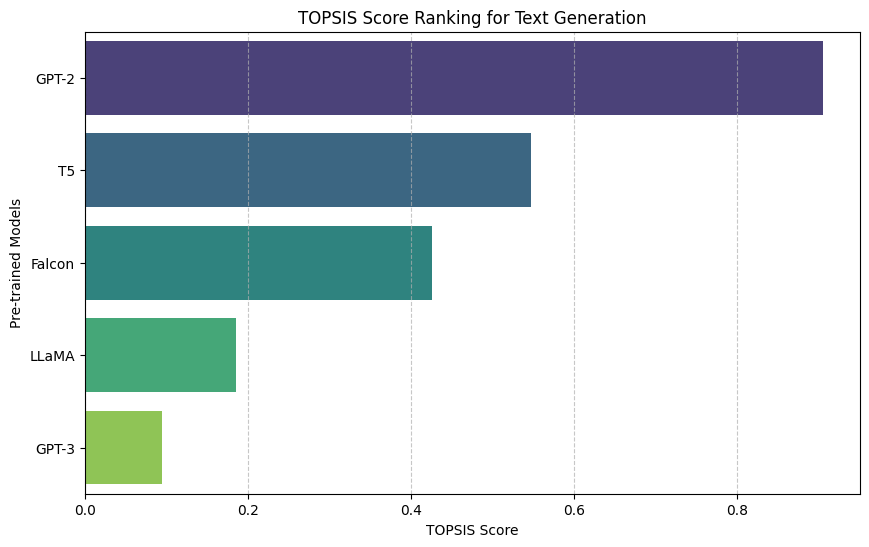

In [13]:
# ----- Visualization -----

# 1. Bar Chart - TOPSIS Scores
plt.figure(figsize=(10, 6))
sns.barplot(x="TOPSIS Score", y="Model", data=df_sorted, palette="viridis")
plt.title(f"TOPSIS Score Ranking for {assigned_task}")
plt.xlabel("TOPSIS Score")
plt.ylabel("Pre-trained Models")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.savefig("topsis_ranking.png")
plt.show()

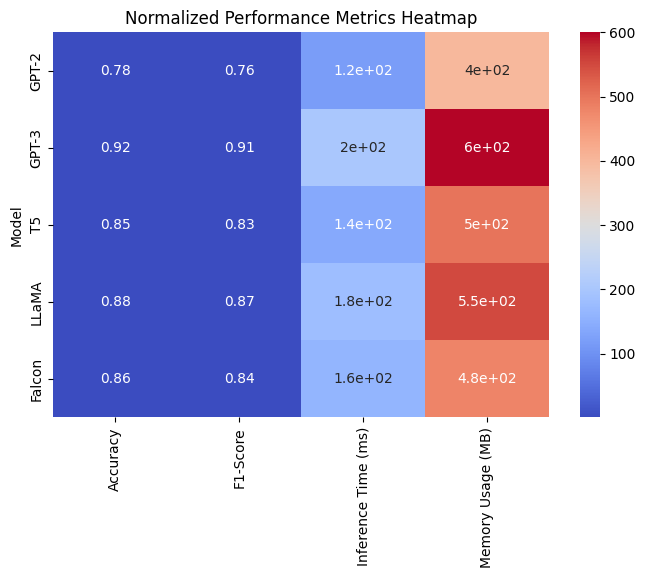

In [15]:
# 2. Heatmap - Normalized Performance Metrics
plt.figure(figsize=(8, 5))
sns.heatmap(df.iloc[:, 1:5].set_index(df["Model"]), cmap="coolwarm", annot=True)
plt.title("Normalized Performance Metrics Heatmap")
plt.savefig("performance_heatmap.png")
plt.show()

C:\Users\shank\AppData\Local\Temp\ipykernel_2752\749884003.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="variable", y="value", data=df_melted, palette="Set2")


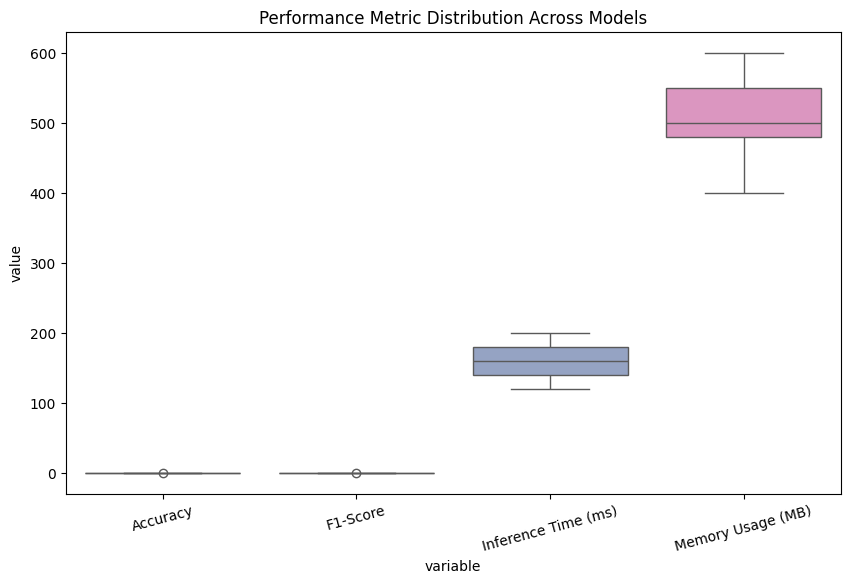

In [17]:
# 3. Box Plot - Distribution of Metrics
plt.figure(figsize=(10, 6))
df_melted = df.melt(id_vars=["Model"], value_vars=["Accuracy", "F1-Score", "Inference Time (ms)", "Memory Usage (MB)"])
sns.boxplot(x="variable", y="value", data=df_melted, palette="Set2")
plt.xticks(rotation=15)
plt.title("Performance Metric Distribution Across Models")
plt.savefig("metric_distribution.png")
plt.show()

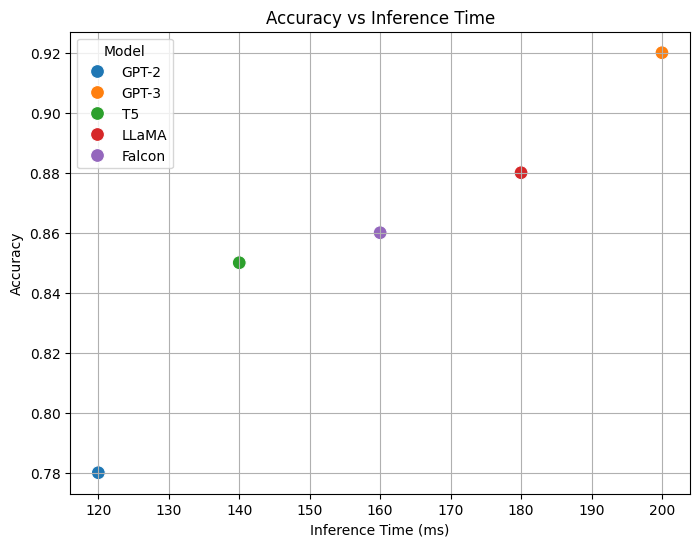

In [19]:
# 4. Scatter Plot - Accuracy vs Inference Time
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Inference Time (ms)"], y=df["Accuracy"], hue=df["Model"], s=100)
plt.title("Accuracy vs Inference Time")
plt.xlabel("Inference Time (ms)")
plt.ylabel("Accuracy")
plt.grid()
plt.savefig("accuracy_vs_time.png")
plt.show()

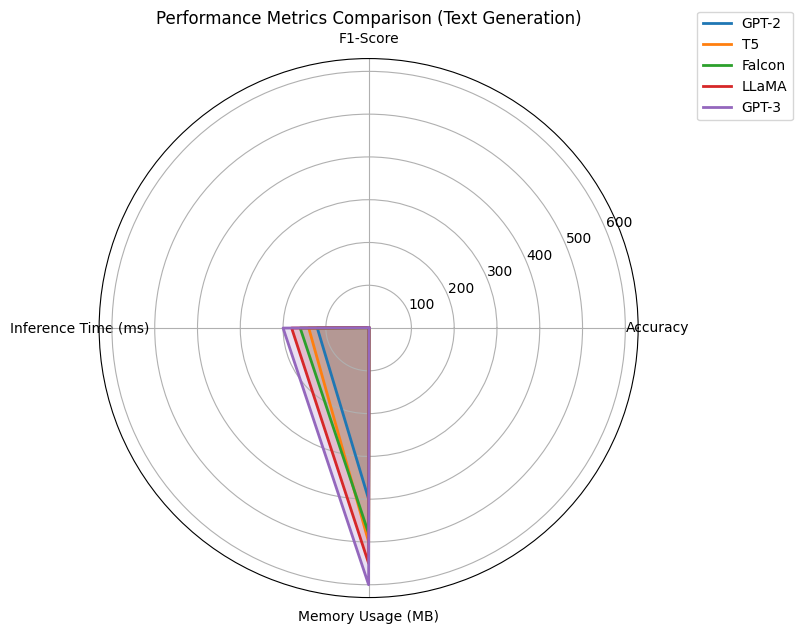

In [21]:
# 5. Radar Chart - Performance Metrics
labels = list(df.columns[1:5])
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

for i, row in df_sorted.iterrows():
    values = row[1:5].tolist() + row[1:2].tolist()
    ax.plot(angles, values, label=row["Model"], linewidth=2)
    ax.fill(angles, values, alpha=0.2)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title(f"Performance Metrics Comparison ({assigned_task})")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.savefig("performance_radar_chart.png")
plt.show()